# Panda Data Type

The pandas package was created by Wes McKinney in 2008 as a result of frustrations he encountered while working on time series data in R. It is built on top of NumPy and provides features not available in it. It provides fast, easy-to-understand data structures and helps fill the gap between Python and a language like R. NumPy deals with homogeneous blocks of data. Using pandas helps to deal with data in a tabular structure composed of different data types.

There are three main data structures in pandas:
- Series—1D
- DataFrame—2D
- Panel—3D

# Series

A Series is really a 1D NumPy array under the hood. It consists of a NumPy array coupled with an array of labels. Just like a NumPy array, a series can be wholly composed of any data type. The labels are together called the index of the series. A series consists of two components—1D data and the index.


In [8]:
# General Syntax Eg
import pandas as pd
import numpy as np

data = np.array([1.0, 3.5, -2.1, 6.2, 0.4])
idx = ["New York", "Cleveland", "San Francisco", "Neveda", "Texas"]

ser = pd.Series(data, index = idx)

In [9]:
ser

New York         1.0
Cleveland        3.5
San Francisco   -2.1
Neveda           6.2
Texas            0.4
dtype: float64

<AxesSubplot:>

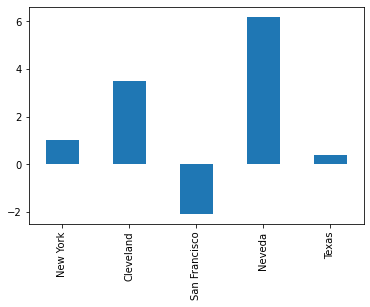

In [10]:
# Panda's builtin visualization
ser.plot.bar()

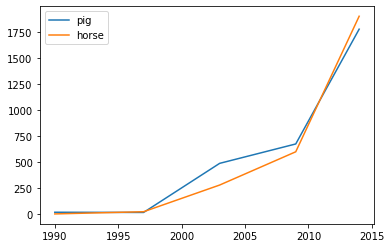

In [5]:
df = pd.DataFrame({
   'pig': [20, 18, 489, 675, 1776],
   'horse': [4, 25, 281, 600, 1900]
   }, index=[1990, 1997, 2003, 2009, 2014])
lines = df.plot.line()

Here, data can be one of the following:
- An ndarray
- A Python dictionary
- A scalar value

If an index is not specified, the following default index `[0,... n-1]` will be created, where n is the length of the data.

A series can be created from a variety of sources as shown in the following subsections.


In [11]:
import calendar as cal

monthNames=[cal.month_name[i] for i in np.arange(1,6)]

months = pd.Series(np.arange(1,6), index = monthNames)

months

January     1
February    2
March       3
April       4
May         5
dtype: int64

In [12]:
months.index

Index(['January', 'February', 'March', 'April', 'May'], dtype='object')

In [13]:
currDict={'US' : 'dollar', 'UK' : 'pound', 'Germany': 'euro', 'Mexico':'peso', 'Nigeria':'naira', 'China':'yuan', 'Japan':'yen'}
currSeries = pd.Series(currDict)
currSeries

US         dollar
UK          pound
Germany      euro
Mexico       peso
Nigeria     naira
China        yuan
Japan         yen
dtype: object

# DataFrame

A DataFrame is a two-dimensional data structure composed of rows and columns—exactly like a simple spreadsheet or a SQL table. Each column of a DataFrame is a pandas Series. These columns should be of the same length, but they can be of different data types—float, int, bool, and so on. DataFrames are both value-mutable and size-mutable. This lets us perform operations that would alter values held within the DataFrame or add/delete columns to/from the DataFrame.

Similar to a Series, which has a name and index as attributes, a DataFrame has column names and a row index. The row index can be made of either numerical values or strings such as month names. Indexes are needed for fast lookups as well as proper aligning and joining of data in pandas multilevel indexing is also possible in DataFrames. The following is a simple view of a DataFrame with five rows and three columns. In general, the index is not counted as a column:
    

A DataFrame is the most commonly used data structure in pandas. The constructor accepts many different types of arguments:

- Dictionary of 1D ndarrays, lists, dictionaries, or Series structures
- 2D NumPy array
- Structured or record ndarray
- Series
- Another DataFrame

Row label indexes and column labels can be specified along with the data. If they're not specified, they will be generated from the input data in an intuitive fashion, for example, from the keys of dict (in the case of column labels) or by using np.range(n) in the case of row labels, where n corresponds to the number of rows.

A DataFrame can be created from a variety of sources as discussed in the following subsections.

In [14]:
# Classic eg of data frame

stockSummaries = {
'AMZN': pd.Series([346.15,0.59,459,0.52,589.8,158.88],
index=['Closing price','EPS',
'Shares Outstanding(M)',
'Beta', 'P/E','Market Cap(B)']),
'GOOG': pd.Series([1133.43,36.05,335.83,0.87,31.44,380.64],
index=['Closing price','EPS','Shares Outstanding(M)',
'Beta','P/E','Market Cap(B)']),
'FB': pd.Series([61.48,0.59,2450,104.93,150.92],
index=['Closing price','EPS','Shares Outstanding(M)',
'P/E', 'Market Cap(B)']),
'YHOO': pd.Series([34.90,1.27,1010,27.48,0.66,35.36],
index=['Closing price','EPS','Shares Outstanding(M)',
'P/E','Beta', 'Market Cap(B)']),
'TWTR':pd.Series([65.25,-0.3,555.2,36.23],
index=['Closing price','EPS','Shares Outstanding(M)',
'Market Cap(B)']),
'AAPL':pd.Series([501.53,40.32,892.45,12.44,447.59,0.84],
index=['Closing price','EPS','Shares Outstanding(M)','P/E',
'Market Cap(B)','Beta'])}


In [15]:
stockDF = pd.DataFrame(stockSummaries)

In [18]:
stockDF

,FB,TWTR,SCNW
Closing price,61.48,65.25,NaN
EPS,0.59,-0.30,NaN
Shares Outstanding(M),2450.00,555.20,NaN
P/E,104.93,NaN,NaN
Market Cap(B),150.92,36.23,NaN
Beta,NaN,NaN,NaN


In [17]:
stockDF = pd.DataFrame(stockSummaries,
index=['Closing price','EPS',
'Shares Outstanding(M)',
'P/E', 'Market Cap(B)','Beta'],
columns=['FB','TWTR','SCNW'])

In [19]:
print(f"index: {stockDF.index} \ncolumns: {stockDF.columns}")

index: Index(['Closing price', 'EPS', 'Shares Outstanding(M)', 'P/E', 'Market Cap(B)',
       'Beta'],
      dtype='object') 
columns: Index(['FB', 'TWTR', 'SCNW'], dtype='object')


## Notes on Structured Array

Structured arrays are slightly different from ndarrays. Each field in a structured array can be of a different data type. For more information on structured arrays, refer to the following: http://docs.scipy.org/doc/numpy/user/basics.rec.html.

The following is an example of a structured array:


In [20]:
memberData = np.array([('Sanjeev',37,162.4),
('Yingluck',45,137.8),
('Emeka',28,153.2),
('Amy',67,101.3)],
dtype = [('Name','a15'),
('Age','i4'),
('Weight','f4')])

In [21]:
memberDF = pd.DataFrame(memberData)

In [22]:
memberDF

,Name,Age,Weight
0,b'Sanjeev',37,162.399994
1,b'Yingluck',45,137.800003
2,b'Emeka',28,153.199997
3,b'Amy',67,101.300003


In [24]:
memberData.dtype

dtype([('Name', 'S15'), ('Age', '<i4'), ('Weight', '<f4')])

In [25]:
type(memberData)

numpy.ndarray

In [26]:
# Multilevel eg
salesData = {("2012", "Q1"): {("North", "Brand A"): 100, ("North", "Brand B"): 80, ("South", "Brand A"): 25, ("South", "Brand B"): 40},
("2012", "Q2"): {("North", "Brand A"): 30, ("South", "Brand B"): 50},
("2013", "Q1"): {("North", "Brand A"): 80, ("North", "Brand B"): 10, ("South", "Brand B"): 25},
("2013", "Q2"): {("North", "Brand A"): 70, ("North", "Brand B"): 50, ("South", "Brand A"): 35, ("South", "Brand B"): 40}}

salesDF = pd.DataFrame(salesData)
salesDF

2012        2013    
                Q1    Q2    Q1  Q2
North Brand A  100  30.0  80.0  70
      Brand B   80   NaN  10.0  50
South Brand A   25   NaN   NaN  35
      Brand B   40  50.0  25.0  40

# Panels
A Panel is a 3D array. It is not as widely used as Series or DataFrames. It is not as easily displayed on screen or visualized as the other two because of its 3D nature. The Panel data structure is the final piece of the data structure puzzle in pandas. It is less widely used. It is generally used for 3D time-series data. The three axis names are as follows:

- items: This is axis 0. Each item corresponds to a DataFrame structure.
- major_axis: This is axis 1. Each item corresponds to the rows of the DataFrame structure.
- minor_axis: This is axis 2. Each item corresponds to the columns of each DataFrame structure.

Panels are deprecated and will not be available in future versions. Hence, it's advisable to use multi-indexing in DataFrames instead of Panels.

As with Series and DataFrames, there are different ways to create Panel objects. They are explained in the upcoming sections.